In [288]:
# Sedction for imports

# importing required libraries
import numpy as np
import pandas as pd

# importing required libraries
import numpy as np
import pandas as pd

import pickle # saving and loading trained model
from os import path

# importing required libraries for normalizing data
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler

# importing library for plotting
import matplotlib.pyplot as plt

# importing library for support vector machine classifier
from sklearn.svm import SVC
# importing library for K-neares-neighbor classifier
from sklearn.neighbors import KNeighborsClassifier
# importing library for Linear Discriminant Analysis Model
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
# importing library for Quadratic Discriminant Analysis Model
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

from sklearn import metrics

from keras.layers import Dense # importing dense layer
from keras.models import Sequential #importing Sequential layer
from keras.models import model_from_json # saving and loading trained model

from keras.layers import LSTM
from keras.layers import Input
from keras.models import Model

# representation of model layers

from sklearn.model_selection import train_test_split # for splitting the dataset for training and testing
from sklearn.metrics import classification_report # for generating a classification report of model

from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve, auc
from keras.utils.vis_utils import plot_model

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay




In [289]:
col_names = ["duration","protocol_type","service","flag","src_bytes",
    "dst_bytes","land","wrong_fragment","urgent","hot","num_failed_logins",
    "logged_in","num_compromised","root_shell","su_attempted","num_root",
    "num_file_creations","num_shells","num_access_files","num_outbound_cmds",
    "is_host_login","is_guest_login","count","srv_count","serror_rate",
    "srv_serror_rate","rerror_rate","srv_rerror_rate","same_srv_rate",
    "diff_srv_rate","srv_diff_host_rate","dst_host_count","dst_host_srv_count",
    "dst_host_same_srv_rate","dst_host_diff_srv_rate","dst_host_same_src_port_rate",
    "dst_host_srv_diff_host_rate","dst_host_serror_rate","dst_host_srv_serror_rate",
    "dst_host_rerror_rate","dst_host_srv_rerror_rate","label","difficulty_level"]

In [290]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [291]:
data = pd.read_csv('/content/drive/MyDrive/Assignment3_ai/KDDTrain+.txt',header=None, names=col_names)


In [292]:
data

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,label,difficulty_level
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,...,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal,20
1,0,udp,other,SF,146,0,0,0,0,0,...,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal,15
2,0,tcp,private,S0,0,0,0,0,0,0,...,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,neptune,19
3,0,tcp,http,SF,232,8153,0,0,0,0,...,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal,21
4,0,tcp,http,SF,199,420,0,0,0,0,...,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal,21
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125968,0,tcp,private,S0,0,0,0,0,0,0,...,0.10,0.06,0.00,0.00,1.00,1.00,0.00,0.00,neptune,20
125969,8,udp,private,SF,105,145,0,0,0,0,...,0.96,0.01,0.01,0.00,0.00,0.00,0.00,0.00,normal,21
125970,0,tcp,smtp,SF,2231,384,0,0,0,0,...,0.12,0.06,0.00,0.00,0.72,0.00,0.01,0.00,normal,18
125971,0,tcp,klogin,S0,0,0,0,0,0,0,...,0.03,0.05,0.00,0.00,1.00,1.00,0.00,0.00,neptune,20


In [293]:
data.drop(['difficulty_level'],axis=1,inplace=True)
data.shape

(125973, 42)

In [294]:
# descriptive statistics of dataset
data.describe()

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
count,125973.00000,1.259730e+05,1.259730e+05,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,...,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000
mean,287.14465,4.556674e+04,1.977911e+04,0.000198,0.022687,0.000111,0.204409,0.001222,0.395736,0.279250,...,182.148945,115.653005,0.521242,0.082951,0.148379,0.032542,0.284452,0.278485,0.118832,0.120240
std,2604.51531,5.870331e+06,4.021269e+06,0.014086,0.253530,0.014366,2.149968,0.045239,0.489010,23.942042,...,99.206213,110.702741,0.448949,0.188922,0.308997,0.112564,0.444784,0.445669,0.306557,0.319459
min,0.00000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.00000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,82.000000,10.000000,0.050000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.00000,4.400000e+01,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,255.000000,63.000000,0.510000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.00000,2.760000e+02,5.160000e+02,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,255.000000,255.000000,1.000000,0.070000,0.060000,0.020000,1.000000,1.000000,0.000000,0.000000
max,42908.00000,1.379964e+09,1.309937e+09,1.000000,3.000000,3.000000,77.000000,5.000000,1.000000,7479.000000,...,255.000000,255.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [295]:
# number of attack labels 
data['label'].value_counts()

normal             67343
neptune            41214
satan               3633
ipsweep             3599
portsweep           2931
smurf               2646
nmap                1493
back                 956
teardrop             892
warezclient          890
pod                  201
guess_passwd          53
buffer_overflow       30
warezmaster           20
land                  18
imap                  11
rootkit               10
loadmodule             9
ftp_write              8
multihop               7
phf                    4
perl                   3
spy                    2
Name: label, dtype: int64

In [296]:
# changing attack labels to their respective attack class
def change_label(df):
  df.label.replace(['apache2','back','land','neptune','mailbomb','pod','processtable','smurf','teardrop','udpstorm','worm'],'Dos',inplace=True)
  df.label.replace(['ftp_write','guess_passwd','httptunnel','imap','multihop','named','phf','sendmail',
       'snmpgetattack','snmpguess','spy','warezclient','warezmaster','xlock','xsnoop'],'R2L',inplace=True)
  df.label.replace(['ipsweep','mscan','nmap','portsweep','saint','satan'],'Probe',inplace=True)
  df.label.replace(['buffer_overflow','loadmodule','perl','ps','rootkit','sqlattack','xterm'],'U2R',inplace=True)

In [297]:
# calling change_label() function
change_label(data)

In [298]:
data.head(20)

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,label
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,...,25,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal
1,0,udp,other,SF,146,0,0,0,0,0,...,1,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal
2,0,tcp,private,S0,0,0,0,0,0,0,...,26,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,Dos
3,0,tcp,http,SF,232,8153,0,0,0,0,...,255,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal
4,0,tcp,http,SF,199,420,0,0,0,0,...,255,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal
5,0,tcp,private,REJ,0,0,0,0,0,0,...,19,0.07,0.07,0.00,0.00,0.00,0.00,1.00,1.00,Dos
6,0,tcp,private,S0,0,0,0,0,0,0,...,9,0.04,0.05,0.00,0.00,1.00,1.00,0.00,0.00,Dos
7,0,tcp,private,S0,0,0,0,0,0,0,...,15,0.06,0.07,0.00,0.00,1.00,1.00,0.00,0.00,Dos
8,0,tcp,remote_job,S0,0,0,0,0,0,0,...,23,0.09,0.05,0.00,0.00,1.00,1.00,0.00,0.00,Dos
9,0,tcp,private,S0,0,0,0,0,0,0,...,13,0.05,0.06,0.00,0.00,1.00,1.00,0.00,0.00,Dos


In [299]:
data.label.value_counts()

normal    67343
Dos       45927
Probe     11656
R2L         995
U2R          52
Name: label, dtype: int64

In [300]:
# !pip install dataprep

In [301]:
# from dataprep.eda import create_report
# report = create_report(data, title='My Report')
# report

# report.save('report_01')

# One-hot-encoding

In [302]:
# selecting categorical data attributes
cat_col = ['protocol_type','service','flag']
cat_col

['protocol_type', 'service', 'flag']

In [303]:
# creating a dataframe with only categorical attributes
categorical = data[cat_col]
categorical.head()


,protocol_type,service,flag
0,tcp,ftp_data,SF
1,udp,other,SF
2,tcp,private,S0
3,tcp,http,SF
4,tcp,http,SF


In [304]:
# one-hot-encoding categorical attributes using pandas.get_dummies() function
categorical = pd.get_dummies(categorical,columns=cat_col)
categorical.head()
categorical.shape

(125973, 84)

In [305]:
numeric_multi = categorical.join(data)
numeric_multi.head()

,protocol_type_icmp,protocol_type_tcp,protocol_type_udp,service_IRC,service_X11,service_Z39_50,service_aol,service_auth,service_bgp,service_courier,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,label
0,0,1,0,0,0,0,0,0,0,0,...,25,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal
1,0,0,1,0,0,0,0,0,0,0,...,1,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal
2,0,1,0,0,0,0,0,0,0,0,...,26,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,Dos
3,0,1,0,0,0,0,0,0,0,0,...,255,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal
4,0,1,0,0,0,0,0,0,0,0,...,255,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal


# ADASYN

In [306]:
# U2R=data.label['U2R']   bin_label = pd.DataFrame(data.label.map(lambda x:'normal' if x=='normal' else 'abnormal'))
# U2R

# normal    67343
# Dos       45927
# Probe     11656
# R2L         995
# U2R          52

In [307]:
le1 = preprocessing.LabelEncoder()

label = numeric_multi[['label']]

enc_label = label.apply(le1.fit_transform)
numeric_multi['label'] = enc_label

numeric_multi

,protocol_type_icmp,protocol_type_tcp,protocol_type_udp,service_IRC,service_X11,service_Z39_50,service_aol,service_auth,service_bgp,service_courier,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,label
0,0,1,0,0,0,0,0,0,0,0,...,25,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,4
1,0,0,1,0,0,0,0,0,0,0,...,1,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,4
2,0,1,0,0,0,0,0,0,0,0,...,26,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,0
3,0,1,0,0,0,0,0,0,0,0,...,255,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,4
4,0,1,0,0,0,0,0,0,0,0,...,255,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125968,0,1,0,0,0,0,0,0,0,0,...,25,0.10,0.06,0.00,0.00,1.00,1.00,0.00,0.00,0
125969,0,0,1,0,0,0,0,0,0,0,...,244,0.96,0.01,0.01,0.00,0.00,0.00,0.00,0.00,4
125970,0,1,0,0,0,0,0,0,0,0,...,30,0.12,0.06,0.00,0.00,0.72,0.00,0.01,0.00,4
125971,0,1,0,0,0,0,0,0,0,0,...,8,0.03,0.05,0.00,0.00,1.00,1.00,0.00,0.00,0


In [308]:
le1 = preprocessing.LabelEncoder()

label = numeric_multi[['flag']]

enc_label = label.apply(le1.fit_transform)
numeric_multi['flag'] = enc_label



label = numeric_multi[['protocol_type']]

enc_label = label.apply(le1.fit_transform)
numeric_multi['protocol_type'] = enc_label


label = numeric_multi[['service']]

enc_label = label.apply(le1.fit_transform)
numeric_multi['service'] = enc_label

numeric_multi.shape

(125973, 126)

In [309]:
data.shape

(125973, 42)

In [310]:
# numeric_multi=numeric_multi.drop(columns=['protocol_type','service','flag'])
numeric_multi.shape

(125973, 126)

In [311]:
dfR2L_and_U2R = numeric_multi.loc[(data['label'] == 'R2L') | (data['label'] == 'U2R')] 
dfR2L_and_U2R.shape
dfR2L_and_U2R.label.value_counts()

2    995
3     52
Name: label, dtype: int64

In [312]:
# dfU2R = numeric_multi.loc[data['label'] == 'U2R']
# dfU2R.shape

In [313]:
import seaborn as sns
from sklearn.datasets import make_classification
from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import ADASYN

In [314]:
X_for_ADASYN = dfR2L_and_U2R.iloc[:,0:125] 
Y_for_ADASYN = dfR2L_and_U2R[['label']]
X_for_ADASYN.head()

Y_for_ADASYN.head()

,label
13,2
48,2
148,2
190,2
222,2


In [315]:
X_for_ADASYN.shape,Y_for_ADASYN.shape

((1047, 125), (1047, 1))

In [316]:
# X_train, X_test, y_train, y_test
adsn = ADASYN()
new_X, new_y = adsn.fit_resample(X_for_ADASYN,Y_for_ADASYN)
new_X.shape, new_y.shape



((1991, 125), (1991, 1))

In [317]:
augmanted_data = new_X.join(new_y)
augmanted_data.shape

(1991, 126)

In [318]:
augmanted_data['wrong_fragment']

0       0
1       0
2       0
3       0
4       0
       ..
1986    0
1987    0
1988    0
1989    0
1990    0
Name: wrong_fragment, Length: 1991, dtype: int64

#Data normilization



In [319]:
# selecting numeric attributes columns from data
numeric_col1 = data.select_dtypes(include='number').columns
numeric_col1

Index(['duration', 'src_bytes', 'dst_bytes', 'land', 'wrong_fragment',
       'urgent', 'hot', 'num_failed_logins', 'logged_in', 'num_compromised',
       'root_shell', 'su_attempted', 'num_root', 'num_file_creations',
       'num_shells', 'num_access_files', 'num_outbound_cmds', 'is_host_login',
       'is_guest_login', 'count', 'srv_count', 'serror_rate',
       'srv_serror_rate', 'rerror_rate', 'srv_rerror_rate', 'same_srv_rate',
       'diff_srv_rate', 'srv_diff_host_rate', 'dst_host_count',
       'dst_host_srv_count', 'dst_host_same_srv_rate',
       'dst_host_diff_srv_rate', 'dst_host_same_src_port_rate',
       'dst_host_srv_diff_host_rate', 'dst_host_serror_rate',
       'dst_host_srv_serror_rate', 'dst_host_rerror_rate',
       'dst_host_srv_rerror_rate'],
      dtype='object')

In [320]:
# using standard scaler for normalizing
std_scaler = StandardScaler()
def normalization(df,col):
  for i in col:
    arr = df[i]
    arr = np.array(arr)
    df[i] = std_scaler.fit_transform(arr.reshape(len(arr),1))
  return df

In [321]:
# data before normalization
data.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,label
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,...,25,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal
1,0,udp,other,SF,146,0,0,0,0,0,...,1,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal
2,0,tcp,private,S0,0,0,0,0,0,0,...,26,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,Dos
3,0,tcp,http,SF,232,8153,0,0,0,0,...,255,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal
4,0,tcp,http,SF,199,420,0,0,0,0,...,255,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal


In [322]:
# calling the normalization() function
augmanted_data_normilized = normalization(augmanted_data.copy(),numeric_col1)
augmanted_data_normilized

,protocol_type_icmp,protocol_type_tcp,protocol_type_udp,service_IRC,service_X11,service_Z39_50,service_aol,service_auth,service_bgp,service_courier,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,label
0,0,1,0,0,0,0,0,0,0,0,...,-0.130549,0.878748,-0.356548,1.072244,1.292488,-0.179212,-0.144743,-0.248688,-0.201170,2
1,0,1,0,0,0,0,0,0,0,0,...,0.421175,0.878748,-0.356548,1.072244,1.108139,-0.179212,-0.144743,-0.248688,-0.201170,2
2,0,1,0,0,0,0,0,0,0,0,...,0.053359,0.878748,-0.356548,1.072244,1.200314,-0.179212,-0.144743,-0.248688,-0.201170,2
3,0,1,0,0,0,0,0,0,0,0,...,3.608916,-0.281742,-0.181846,-1.265219,-0.551004,-0.179212,-0.144743,-0.248688,-0.201170,2
4,0,1,0,0,0,0,0,0,0,0,...,0.114662,0.878748,-0.356548,1.072244,1.108139,-0.179212,-0.144743,-0.248688,-0.201170,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1986,0,1,0,0,0,0,0,0,0,0,...,-0.651622,-0.145060,4.736964,-0.809570,-0.551004,-0.179212,-0.144743,-0.248688,-0.201170,3
1987,0,1,0,0,0,0,0,0,0,0,...,-0.498365,0.632359,0.879842,0.523030,1.431434,-0.179212,-0.144743,-0.248688,0.288898,3
1988,0,1,0,0,0,0,0,0,0,0,...,-0.651622,0.092619,3.588280,-0.680079,-0.551004,-0.179212,-0.144743,-0.248688,-0.201170,3
1989,0,1,0,0,0,0,0,0,0,0,...,-0.559668,0.309193,2.501504,-0.197324,0.404704,-0.179212,-0.144743,-0.248688,0.035085,3


In [323]:

import numpy as np
np.random.seed(1337)  # for reproducibility

from keras.preprocessing import sequence
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Lambda
from keras.layers import Embedding
from keras.layers import Convolution1D,MaxPooling1D, Flatten
from keras.datasets import imdb
from keras import backend as K
import pandas as pd
from keras.utils.np_utils import to_categorical

from sklearn.preprocessing import Normalizer
from keras.models import Sequential
from keras.layers import Convolution1D, Dense, Dropout, Flatten, MaxPooling1D
from keras.utils import np_utils
import numpy as np
import h5py
from keras import callbacks
from keras.layers import LSTM, GRU, SimpleRNN
from keras.callbacks import CSVLogger


In [324]:
X= augmanted_data_normilized.iloc[:,0:125] 
Y = augmanted_data_normilized[['label']]
X.shape , Y.shape
# splitting the dataset 75% for training and 25% testing


((1991, 125), (1991, 1))

In [325]:
X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size=0.25, random_state=42)

X_train.shape , X_test.shape, y_train.shape,y_test.shape
X_train

,protocol_type_icmp,protocol_type_tcp,protocol_type_udp,service_IRC,service_X11,service_Z39_50,service_aol,service_auth,service_bgp,service_courier,...,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
973,0,1,0,0,0,0,0,0,0,0,...,-0.765389,-0.498365,0.878748,-0.356548,-0.984723,-0.551004,1.625139,1.797830,5.219943,5.814330
1562,0,1,0,0,0,0,0,0,0,0,...,1.568676,-0.712925,-1.749238,-0.181846,-1.265219,-0.551004,-0.179212,-0.144743,-0.248688,-0.201170
1424,0,1,0,0,0,0,0,0,0,0,...,-0.803187,-0.620971,0.878748,-0.356548,-0.584486,-0.551004,-0.179212,-0.144743,0.419663,0.534017
182,0,1,0,0,0,0,0,0,0,0,...,-0.812637,-0.283806,0.878748,-0.356548,1.072244,1.937711,-0.179212,-0.144743,-0.248688,-0.201170
1068,0,1,0,0,0,0,0,0,0,0,...,1.540327,-0.651622,-1.683067,-0.183395,-1.244498,-0.551004,-0.179212,-0.144743,-0.248688,-0.201170
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1130,0,1,0,0,0,0,0,0,0,0,...,1.568676,-0.651622,-1.723263,-0.181846,-1.265219,-0.551004,-0.179212,-0.144743,-0.248688,-0.201170
1294,0,1,0,0,0,0,0,0,0,0,...,-0.491349,-0.651622,0.533099,-0.333422,0.762818,-0.551004,-0.179212,-0.144743,0.318931,-0.201170
860,0,1,0,0,0,0,0,0,0,0,...,1.568676,0.237267,-1.415857,-0.181846,-1.265219,-0.551004,1.174051,-0.144743,-0.248688,-0.201170
1459,0,1,0,0,0,0,0,0,0,0,...,1.568676,-0.712925,-1.738942,-0.181846,-1.265219,-0.551004,-0.179212,-0.144743,-0.248688,-0.201170


In [326]:

corr= augmanted_data_normilized.corr()
corr_y = abs(corr['label'])
highest_corr = corr_y[corr_y >0.2]
highest_corr.sort_values(ascending=True)

num_root                       0.202100
num_shells                     0.206383
dst_host_srv_diff_host_rate    0.239169
num_compromised                0.247384
root_shell                     0.293074
logged_in                      0.357703
protocol_type_tcp              0.358547
num_file_creations             0.358703
service_ftp                    0.368719
hot                            0.401431
service_telnet                 0.404100
is_guest_login                 0.432110
dst_host_srv_count             0.556993
service_ftp_data               0.619182
service                        0.717921
label                          1.000000
Name: label, dtype: float64

In [327]:
to_drop = [column for column in augmanted_data_normilized.columns if any(augmanted_data_normilized[column] > 0.4)]
df = augmanted_data_normilized.drop(augmanted_data_normilized[to_drop], axis=1)
df['label']=augmanted_data_normilized['label']
df.iloc[:,1:74]


,service_IRC,service_X11,service_Z39_50,service_aol,service_auth,service_bgp,service_courier,service_csnet_ns,service_ctf,service_daytime,...,flag_OTH,flag_REJ,flag_RSTOS0,flag_S0,land,wrong_fragment,num_outbound_cmds,is_host_login,same_srv_rate,label
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.221878,2
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.221878,2
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.221878,2
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.221878,2
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.221878,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1986,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.221878,3
1987,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.221878,3
1988,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.221878,3
1989,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.221878,3


In [328]:
train=df.sample(frac=0.8,random_state=200) #random state is a seed value
test=df.drop(train.index)
test.shape, train.shape
train

,protocol_type_icmp,service_IRC,service_X11,service_Z39_50,service_aol,service_auth,service_bgp,service_courier,service_csnet_ns,service_ctf,...,flag_OTH,flag_REJ,flag_RSTOS0,flag_S0,land,wrong_fragment,num_outbound_cmds,is_host_login,same_srv_rate,label
864,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.221878,2
758,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.221878,2
382,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.221878,2
843,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.221878,2
1106,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.221878,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1482,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.221878,3
160,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.221878,2
1411,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0.0,0.0,0.0,0.0,-6.895631,3
1180,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.221878,3


In [329]:
traindata = train
testdata = test


X = traindata.iloc[:,1:73]
Y = traindata.iloc[:,0]
C = testdata.iloc[:,0]
T = testdata.iloc[:,1:73]



In [330]:
scaler = Normalizer().fit(X)
trainX = scaler.transform(X)

scaler = Normalizer().fit(T)
testT = scaler.transform(T)

y_train = np.array(Y)
y_test = np.array(C)


# reshape input to be [samples, time steps, features]
X_train = np.reshape(trainX, (trainX.shape[0],trainX.shape[1],1))
X_test = np.reshape(testT, (testT.shape[0],testT.shape[1],1))



lstm_output_size = 128

cnn = Sequential()
cnn.add(Convolution1D(64, 3,activation="relu",input_shape=(72, 1)))
cnn.add(Convolution1D(64, 3, activation="relu"))
cnn.add(MaxPooling1D(2))
cnn.add(Flatten())
cnn.add(Dense(128, activation="relu"))
cnn.add(Dropout(0.2))
cnn.add(Dense(1, activation="sigmoid"))



cnn.compile(loss='categorical_crossentropy', optimizer="adam",metrics=['accuracy'])
cnn.fit(X_train, y_train, epochs=10,validation_data=(X_test, y_test))


Epoch 1/10
50/50 [==============================] - 2s 17ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 2/10
50/50 [==============================] - 1s 11ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 3/10
50/50 [==============================] - 1s 11ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 4/10
50/50 [==============================] - 1s 12ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 5/10
50/50 [==============================] - 1s 11ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 6/10
50/50 [==============================] - 1s 11ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 7/10
50/50 [==============================] - 1s 12ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - v

## Binary Classification

In [331]:
# changing attack labels into two categories 'normal' and 'abnormal'
bin_label = pd.DataFrame(data.label.map(lambda x:'normal' if x=='normal' else 'abnormal'))

In [332]:
# creating a dataframe with binary labels (normal,abnormal)
bin_data = data.copy()
bin_data['label'] = bin_label

In [333]:
# label encoding (0,1) binary labels (abnormal,normal)
le1 = preprocessing.LabelEncoder()
enc_label = bin_label.apply(le1.fit_transform)
bin_data['intrusion'] = enc_label

In [334]:
np.save("/content/drive/MyDrive/Assignment3_ai/labels/le1_classes.npy",le1.classes_,allow_pickle=True)

In [335]:
# dataset with binary labels and label encoded column
bin_data.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,label,intrusion
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,...,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal,1
1,0,udp,other,SF,146,0,0,0,0,0,...,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal,1
2,0,tcp,private,S0,0,0,0,0,0,0,...,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,abnormal,0
3,0,tcp,http,SF,232,8153,0,0,0,0,...,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal,1
4,0,tcp,http,SF,199,420,0,0,0,0,...,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal,1


In [336]:
# one-hot-encoding attack label
bin_data = pd.get_dummies(bin_data,columns=['label'],prefix="",prefix_sep="") 
bin_data['label'] = bin_label
bin_data.shape
bin_data.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,intrusion,abnormal,normal,label
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,...,0.17,0.00,0.00,0.00,0.05,0.00,1,0,1,normal
1,0,udp,other,SF,146,0,0,0,0,0,...,0.88,0.00,0.00,0.00,0.00,0.00,1,0,1,normal
2,0,tcp,private,S0,0,0,0,0,0,0,...,0.00,0.00,1.00,1.00,0.00,0.00,0,1,0,abnormal
3,0,tcp,http,SF,232,8153,0,0,0,0,...,0.03,0.04,0.03,0.01,0.00,0.01,1,0,1,normal
4,0,tcp,http,SF,199,420,0,0,0,0,...,0.00,0.00,0.00,0.00,0.00,0.00,1,0,1,normal


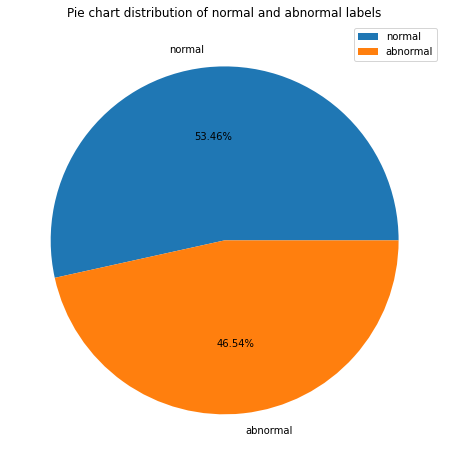

In [337]:
# pie chart distribution of normal and abnormal labels
plt.figure(figsize=(8,8))
plt.pie(bin_data.label.value_counts(),labels=bin_data.label.unique(),autopct='%0.2f%%')
plt.title("Pie chart distribution of normal and abnormal labels")
plt.legend()
plt.savefig('/content/drive/MyDrive/Assignment3_ai/plots/Pie_chart_binary.png')
plt.show()

# Multi-class Classification

In [338]:
# creating a dataframe with multi-class labels (Dos,Probe,R2L,U2R,normal)
multi_data = data.copy()
multi_label = pd.DataFrame(multi_data.label)

In [339]:
# label encoding (0,1,2,3,4) multi-class labels (Dos,normal,Probe,R2L,U2R)
le2 = preprocessing.LabelEncoder()
enc_label = multi_label.apply(le2.fit_transform)
multi_data['intrusion'] = enc_label

In [340]:
np.save("/content/drive/MyDrive/Assignment3_ai/labels/le2_classes.npy",le2.classes_,allow_pickle=True)

In [341]:
# one-hot-encoding attack label
multi_data = pd.get_dummies(multi_data,columns=['label'],prefix="",prefix_sep="") 
multi_data['label'] = multi_label
multi_data.shape

(125973, 48)

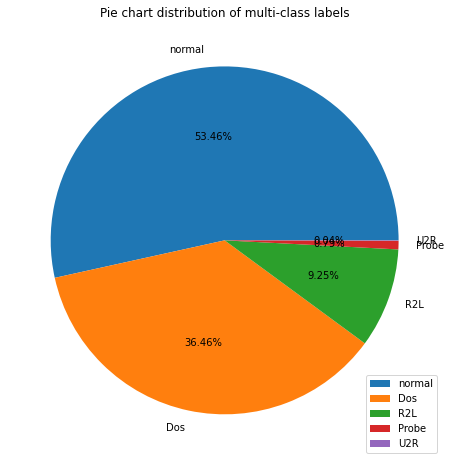

In [342]:
# pie chart distribution of multi-class labels
plt.figure(figsize=(8,8))
plt.pie(multi_data.label.value_counts(),labels=multi_data.label.unique(),autopct='%0.2f%%')
plt.title('Pie chart distribution of multi-class labels')
plt.legend()
plt.savefig('/content/drive/MyDrive/Assignment3_ai/plots/Pie_chart_multi.png')
plt.show()

# Feature Extraction

In [343]:
# selecting numeric attributes columns from data
numeric_col1 = data.select_dtypes(include='number').columns
numeric_col1

Index(['duration', 'src_bytes', 'dst_bytes', 'land', 'wrong_fragment',
       'urgent', 'hot', 'num_failed_logins', 'logged_in', 'num_compromised',
       'root_shell', 'su_attempted', 'num_root', 'num_file_creations',
       'num_shells', 'num_access_files', 'num_outbound_cmds', 'is_host_login',
       'is_guest_login', 'count', 'srv_count', 'serror_rate',
       'srv_serror_rate', 'rerror_rate', 'srv_rerror_rate', 'same_srv_rate',
       'diff_srv_rate', 'srv_diff_host_rate', 'dst_host_count',
       'dst_host_srv_count', 'dst_host_same_srv_rate',
       'dst_host_diff_srv_rate', 'dst_host_same_src_port_rate',
       'dst_host_srv_diff_host_rate', 'dst_host_serror_rate',
       'dst_host_srv_serror_rate', 'dst_host_rerror_rate',
       'dst_host_srv_rerror_rate'],
      dtype='object')

In [344]:
# creating a dataframe with only numeric attributes of binary class dataset and encoded label attribute 
numeric_bin = bin_data[numeric_col1]
numeric_bin['intrusion'] = bin_data['intrusion']

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [345]:
# finding the attributes which have more than 0.5 correlation with encoded attack label attribute 
corr= numeric_bin.corr()
corr_y = abs(corr['intrusion'])
highest_corr = corr_y[corr_y >0.5]
highest_corr.sort_values(ascending=True)

count                       0.576444
srv_serror_rate             0.648289
serror_rate                 0.650652
dst_host_serror_rate        0.651842
dst_host_srv_serror_rate    0.654985
logged_in                   0.690171
dst_host_same_srv_rate      0.693803
dst_host_srv_count          0.722535
same_srv_rate               0.751913
intrusion                   1.000000
Name: intrusion, dtype: float64

In [346]:
# selecting attributes found by using pearson correlation coefficient
numeric_bin = bin_data[['count','srv_serror_rate','serror_rate','dst_host_serror_rate','dst_host_srv_serror_rate',
                         'logged_in','dst_host_same_srv_rate','dst_host_srv_count','same_srv_rate']]

In [347]:
# joining the selected attribute with the one-hot-encoded categorical dataframe
numeric_bin = numeric_bin.join(categorical)
# then joining encoded, one-hot-encoded, and original attack label attribute
bin_data = numeric_bin.join(bin_data[['intrusion','abnormal','normal','label']])

In [348]:
# saving final dataset to disk
bin_data.to_csv("/content/drive/MyDrive/Assignment3_ai/Extracted_Dataset/bin_data.csv")
# final dataset for binary classification
bin_data

,count,srv_serror_rate,serror_rate,dst_host_serror_rate,dst_host_srv_serror_rate,logged_in,dst_host_same_srv_rate,dst_host_srv_count,same_srv_rate,protocol_type_icmp,...,flag_S0,flag_S1,flag_S2,flag_S3,flag_SF,flag_SH,intrusion,abnormal,normal,label
0,2,0.0,0.0,0.00,0.00,0,0.17,25,1.00,0,...,0,0,0,0,1,0,1,0,1,normal
1,13,0.0,0.0,0.00,0.00,0,0.00,1,0.08,0,...,0,0,0,0,1,0,1,0,1,normal
2,123,1.0,1.0,1.00,1.00,0,0.10,26,0.05,0,...,1,0,0,0,0,0,0,1,0,abnormal
3,5,0.2,0.2,0.03,0.01,1,1.00,255,1.00,0,...,0,0,0,0,1,0,1,0,1,normal
4,30,0.0,0.0,0.00,0.00,1,1.00,255,1.00,0,...,0,0,0,0,1,0,1,0,1,normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125968,184,1.0,1.0,1.00,1.00,0,0.10,25,0.14,0,...,1,0,0,0,0,0,0,1,0,abnormal
125969,2,0.0,0.0,0.00,0.00,0,0.96,244,1.00,0,...,0,0,0,0,1,0,1,0,1,normal
125970,1,0.0,0.0,0.72,0.00,1,0.12,30,1.00,0,...,0,0,0,0,1,0,1,0,1,normal
125971,144,1.0,1.0,1.00,1.00,0,0.03,8,0.06,0,...,1,0,0,0,0,0,0,1,0,abnormal


In [349]:
# creating a dataframe with only numeric attributes of multi-class dataset and encoded label attribute 
numeric_multi = multi_data[numeric_col1]
numeric_multi['intrusion'] = multi_data['intrusion']

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [350]:
# finding the attributes which have more than 0.5 correlation with encoded attack label attribute 
corr = numeric_multi.corr()
corr_y = abs(corr['intrusion'])
highest_corr = corr_y[corr_y >0.5]
highest_corr.sort_values(ascending=True)

count                       0.613251
logged_in                   0.693770
srv_serror_rate             0.710852
serror_rate                 0.712861
dst_host_serror_rate        0.714247
dst_host_same_srv_rate      0.716820
dst_host_srv_serror_rate    0.717387
dst_host_srv_count          0.718579
same_srv_rate               0.798358
intrusion                   1.000000
Name: intrusion, dtype: float64

In [351]:
import seaborn

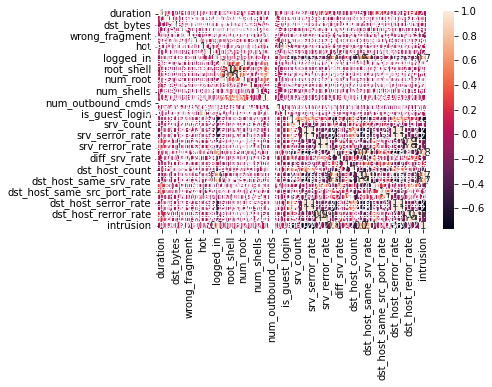

In [352]:
seaborn.heatmap(corr, annot = True, fmt='.1g')

In [353]:
# selecting attributes found by using pearson correlation coefficient
numeric_multi = multi_data[['count','logged_in','srv_serror_rate','serror_rate','dst_host_serror_rate',
                        'dst_host_same_srv_rate','dst_host_srv_serror_rate','dst_host_srv_count','same_srv_rate']]

In [354]:
# joining the selected attribute with the one-hot-encoded categorical dataframe
numeric_multi = numeric_multi.join(categorical)
# then joining encoded, one-hot-encoded, and original attack label attribute
multi_data = numeric_multi.join(multi_data[['intrusion','Dos','Probe','R2L','U2R','normal','label']])

In [355]:
# saving final dataset to disk
multi_data.to_csv('/content/drive/MyDrive/Assignment3_ai/Multi_dataset/multi_data.csv')

# final dataset for multi-class classification
multi_data

,count,logged_in,srv_serror_rate,serror_rate,dst_host_serror_rate,dst_host_same_srv_rate,dst_host_srv_serror_rate,dst_host_srv_count,same_srv_rate,protocol_type_icmp,...,flag_S3,flag_SF,flag_SH,intrusion,Dos,Probe,R2L,U2R,normal,label
0,2,0,0.0,0.0,0.00,0.17,0.00,25,1.00,0,...,0,1,0,4,0,0,0,0,1,normal
1,13,0,0.0,0.0,0.00,0.00,0.00,1,0.08,0,...,0,1,0,4,0,0,0,0,1,normal
2,123,0,1.0,1.0,1.00,0.10,1.00,26,0.05,0,...,0,0,0,0,1,0,0,0,0,Dos
3,5,1,0.2,0.2,0.03,1.00,0.01,255,1.00,0,...,0,1,0,4,0,0,0,0,1,normal
4,30,1,0.0,0.0,0.00,1.00,0.00,255,1.00,0,...,0,1,0,4,0,0,0,0,1,normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125968,184,0,1.0,1.0,1.00,0.10,1.00,25,0.14,0,...,0,0,0,0,1,0,0,0,0,Dos
125969,2,0,0.0,0.0,0.00,0.96,0.00,244,1.00,0,...,0,1,0,4,0,0,0,0,1,normal
125970,1,1,0.0,0.0,0.72,0.12,0.00,30,1.00,0,...,0,1,0,4,0,0,0,0,1,normal
125971,144,0,1.0,1.0,1.00,0.03,1.00,8,0.06,0,...,0,0,0,0,1,0,0,0,0,Dos


# Long Short-Term Memory Classifier (Binary Classification)

In [356]:
X = bin_data.iloc[:,0:93] # dataset excluding target attribute (encoded, one-hot-encoded,original)
Y = bin_data[['intrusion']] # target attribute

In [357]:
# splitting the dataset 75% for training and 25% testing
X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size=0.25, random_state=42)

In [358]:
X_train = X_train.values

In [359]:
y_train = np.array(y_train)

In [360]:
x_train = np.reshape(X_train, (X_train.shape[0],1,X_train.shape[1]))

In [361]:
lst = Sequential()
# input layer and LSTM layer with 50 neurons
lst.add(LSTM(50,input_dim=93))

# outpute layer with sigmoid activation
lst.add(Dense(1,activation='sigmoid'))

In [362]:
# defining loss function, optimizer, metrics and then compiling model
lst.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [363]:
# summary of model layers
lst.summary()

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_8 (LSTM)               (None, 50)                28800     
                                                                 
 dense_14 (Dense)            (None, 1)                 51        
                                                                 
Total params: 28,851
Trainable params: 28,851
Non-trainable params: 0
_________________________________________________________________


In [364]:
# training the model on training dataset
history = lst.fit(x_train, y_train, epochs=5, batch_size=5000,validation_split=0.2)

Epoch 1/5
16/16 [==============================] - 3s 47ms/step - loss: 0.6197 - accuracy: 0.6316 - val_loss: 0.4568 - val_accuracy: 0.9033
Epoch 2/5
16/16 [==============================] - 0s 11ms/step - loss: 0.3882 - accuracy: 0.9017 - val_loss: 0.3335 - val_accuracy: 0.9036
Epoch 3/5
16/16 [==============================] - 0s 11ms/step - loss: 0.3121 - accuracy: 0.9051 - val_loss: 0.2851 - val_accuracy: 0.9084
Epoch 4/5
16/16 [==============================] - 0s 11ms/step - loss: 0.2707 - accuracy: 0.9093 - val_loss: 0.2580 - val_accuracy: 0.9130
Epoch 5/5
16/16 [==============================] - 0s 11ms/step - loss: 0.2515 - accuracy: 0.9137 - val_loss: 0.2436 - val_accuracy: 0.9164


In [365]:
X_test = X_test.to_numpy()

In [366]:
x_test = np.reshape(X_test, (X_test.shape[0],1,X_test.shape[1]))

In [367]:
filepath = '/content/drive/MyDrive/Assignment3_ai/Trained_Models/lst_binary.json'
weightspath = '/content/drive/MyDrive/Assignment3_ai/Weights/lst_binary.h5'
if (not path.isfile(filepath)):
  # serialize model to JSON
  lst_json = lst.to_json()
  with open(filepath, "w") as json_file:
    json_file.write(lst_json)

  # serialize weights to HDF5
  lst.save_weights(weightspath)
  print("Saved model to disk")

  # load json and create model
  json_file = open(filepath, 'r')
  loaded_model_json = json_file.read()
  json_file.close()
  lst = model_from_json(loaded_model_json)

  # load weights into new model
  lst.load_weights(weightspath)
  print("Loaded model from disk")

In [368]:
# load json and create model
json_file = open(filepath, 'r')
loaded_model_json = json_file.read()
json_file.close()
lst = model_from_json(loaded_model_json)

# load weights into new model
lst.load_weights(weightspath)
print("Loaded model from disk")

Loaded model from disk


In [369]:
# defining loss function, optimizer, metrics and then compiling model
lst.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [370]:
# predicting target attribute on testing dataset
test_results = lst.evaluate(x_test, y_test, verbose=1)
print(f'Test results - Loss: {test_results[0]} - Accuracy: {test_results[1]*100}%')

985/985 [==============================] - 4s 3ms/step - loss: 0.6130 - accuracy: 0.9034
Test results - Loss: 0.6130234599113464 - Accuracy: 90.34419059753418%


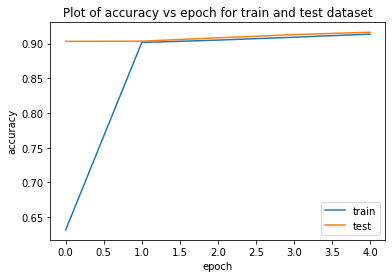

In [371]:
# Plot of accuracy vs epoch of train and test dataset
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title("Plot of accuracy vs epoch for train and test dataset")
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='best')
plt.savefig('/content/drive/MyDrive/Assignment3_ai/plots/lstm_binary_accuracy.png')
plt.show()

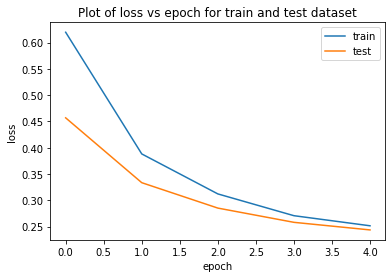

In [372]:
# Plot of loss vs epoch of train and test dataset
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title("Plot of loss vs epoch for train and test dataset")
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='best')
plt.savefig('/content/drive/MyDrive/Assignment3_ai/plots/lstm_binary_loss.png')
plt.show()

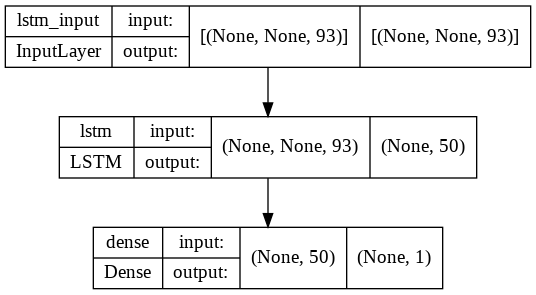

In [373]:
# representation of model layers
plot_model(lst, to_file='/content/drive/MyDrive/Assignment3_ai/plots/lstm_binary.png', show_shapes=True,)

In [374]:
y_test.shape

(31494, 1)

In [375]:
y_pred = lst.predict(x_test)

In [376]:
y_pred.shape

(31494, 1)

In [377]:
y_pred = lst.predict(x_test)
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
auc = auc(fpr, tpr)

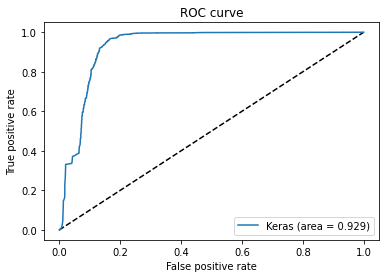

In [378]:
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr, label='Keras (area = {:.3f})'.format(auc))
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='best')
plt.savefig('/content/drive/MyDrive/Assignment3_ai/plots/lstm_binary_roc.png')
plt.show()

In [393]:
y_classes = (lst.predict(x_test)>0.5).astype('int32')

# Bi LSTM Classification


In [394]:
 import numpy as np
 from keras.preprocessing import sequence
 from keras.models import Sequential
 from keras.layers import Dense, Dropout, Embedding, LSTM, Bidirectional

In [437]:
 n_unique_words = 10000 # cut texts after this number of words
 maxlen = 200
 batch_size = 128 

In [436]:
X = bin_data.iloc[:,0:93] # dataset excluding target attribute (encoded, one-hot-encoded,original)
Y = bin_data[['intrusion']] # target attribute

In [438]:
# X_train, X_test, y_train, y_test
x_train,x_test, y_train, y_test = train_test_split(X,Y, test_size=0.25, random_state=42)
x_train.shape, y_train.shape,x_test.shape, y_test.shape


((94479, 93), (94479, 1), (31494, 93), (31494, 1))

In [439]:
 x_train = x_train.values
 x_test = x_test.to_numpy()
 y_train = np.array(y_train)
 y_test = np.array(y_test) 

In [440]:
x_train

array([[ 20.,   1.,   1., ...,   0.,   0.,   0.],
       [146.,   1.,   1., ...,   0.,   0.,   0.],
       [117.,   1.,   1., ...,   0.,   0.,   0.],
       ...,
       [258.,   0.,   0., ...,   0.,   0.,   0.],
       [  5.,   0.,   0., ...,   0.,   1.,   0.],
       [202.,   0.,   0., ...,   0.,   1.,   0.]])

In [441]:
 model1 = Sequential()
 model1.add(Embedding(n_unique_words, 128,input_length=93 ))
 model1.add(Bidirectional(LSTM(64)))
 model1.add(Dropout(0.5))
 model1.add(Dense(1, activation='sigmoid'))
 model1.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy']) 

In [442]:
x_train.shape,y_train.shape

((94479, 93), (94479, 1))

In [443]:
import tensorflow as tf
tf.test.gpu_device_name()

'/device:GPU:0'

In [445]:
 history=model1.fit(x_train, y_train,
           batch_size=batch_size,
           epochs=3,
           validation_data=[x_test, y_test])
 print(history.history['loss'])
 print(history.history['accuracy']) 

Epoch 1/3
739/739 [==============================] - 38s 52ms/step - loss: 0.1388 - accuracy: 0.9510 - val_loss: 0.1066 - val_accuracy: 0.9627
Epoch 2/3
739/739 [==============================] - 28s 38ms/step - loss: 0.0937 - accuracy: 0.9686 - val_loss: 0.0895 - val_accuracy: 0.9693
Epoch 3/3
739/739 [==============================] - 29s 39ms/step - loss: 0.0843 - accuracy: 0.9706 - val_loss: 0.0753 - val_accuracy: 0.9721
[0.13880212604999542, 0.09366372227668762, 0.08425287902355194]
[0.9509520530700684, 0.9686173796653748, 0.9705966114997864]


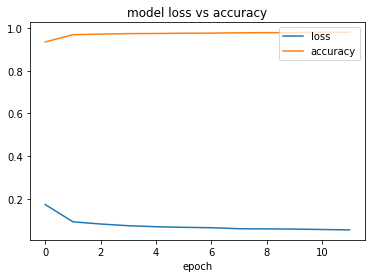

In [404]:
 from matplotlib import pyplot
 pyplot.plot(history.history['loss'])
 pyplot.plot(history.history['accuracy'])
 pyplot.title('model loss vs accuracy')
 pyplot.xlabel('epoch')
 pyplot.legend(['loss', 'accuracy'], loc='upper right')
 pyplot.show() 

In [446]:
# predicting target attribute on testing dataset
test_results = model1.evaluate(x_test, y_test, verbose=1)
print(f'Test results - Loss: {test_results[0]} - Accuracy: {test_results[1]*100}%')

985/985 [==============================] - 17s 17ms/step - loss: 0.0753 - accuracy: 0.9721
Test results - Loss: 0.0753013864159584 - Accuracy: 97.2089946269989%


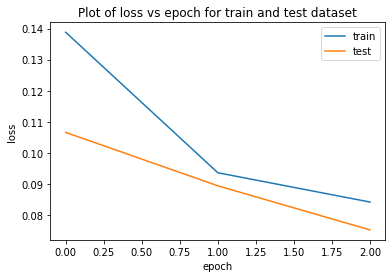

In [447]:
# Plot of loss vs epoch of train and test dataset
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title("Plot of loss vs epoch for train and test dataset")
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='best')
plt.savefig('/content/drive/MyDrive/Assignment3_ai/plots/lstm_binary_loss.png')
plt.show()

In [463]:
y_pred1 = model1.predict(x_test)
fpr, tpr, thresholds = roc_curve(y_test, y_pred1)
auc = metrics.auc(fpr, tpr)

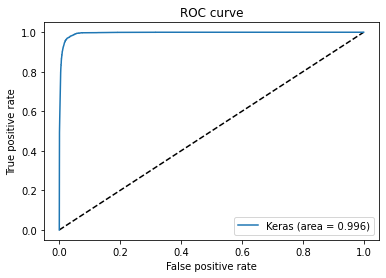

In [449]:
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr, label='Keras (area = {:.3f})'.format(auc))
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='best')
plt.savefig('/content/drive/MyDrive/Assignment3_ai/plots/lstm_binary_roc.png')
plt.show()

# Muticlass 

In [410]:
X = multi_data.iloc[:,0:93]  # dataset excluding target attribute (encoded, one-hot-encoded,original)
Y = multi_data[['Dos','normal','Probe','R2L','U2R']] # target attributes

In [411]:
# splitting the dataset 75% for training and 25% testing
x_train,x_test, y_train, y_test = train_test_split(X,Y, test_size=0.25, random_state=42)

In [412]:
# x_train,x_test, y_train, y_test = train_test_split(X,Y, test_size=0.25, random_state=42)
x_train.shape, y_train.shape,x_test.shape, y_test.shape

((94479, 93), (94479, 5), (31494, 93), (31494, 5))

In [413]:
 model = Sequential()
 model.add(Embedding(n_unique_words, 128,input_length=93 ))
 model.add(Bidirectional(LSTM(64)))
 model.add(Dropout(0.5))
 model.add(Dense(5, activation='sigmoid'))
 model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy']) 

In [414]:
model.summary()

Model: "sequential_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_7 (Embedding)     (None, 93, 128)           1280000   
                                                                 
 bidirectional_7 (Bidirectio  (None, 128)              98816     
 nal)                                                            
                                                                 
 dropout_10 (Dropout)        (None, 128)               0         
                                                                 
 dense_16 (Dense)            (None, 5)                 645       
                                                                 
Total params: 1,379,461
Trainable params: 1,379,461
Non-trainable params: 0
_________________________________________________________________


In [415]:
 x_train = x_train.values
 x_test = x_test.to_numpy()
 y_train = np.array(y_train)
 y_test = np.array(y_test) 

In [416]:
 history=model.fit(x_train, y_train,
           batch_size=batch_size,
           epochs=12,
           validation_data=[x_test, y_test])
 print(history.history['loss'])
 print(history.history['accuracy']) 

Epoch 1/12
739/739 [==============================] - 43s 54ms/step - loss: 0.3135 - accuracy: 0.8937 - val_loss: 0.1424 - val_accuracy: 0.9539
Epoch 2/12
739/739 [==============================] - 30s 40ms/step - loss: 0.1304 - accuracy: 0.9588 - val_loss: 0.1009 - val_accuracy: 0.9651
Epoch 3/12
739/739 [==============================] - 28s 39ms/step - loss: 0.1035 - accuracy: 0.9659 - val_loss: 0.0902 - val_accuracy: 0.9708
Epoch 4/12
739/739 [==============================] - 29s 39ms/step - loss: 0.0930 - accuracy: 0.9694 - val_loss: 0.0815 - val_accuracy: 0.9731
Epoch 5/12
739/739 [==============================] - 29s 39ms/step - loss: 0.0873 - accuracy: 0.9704 - val_loss: 0.0789 - val_accuracy: 0.9723
Epoch 6/12
739/739 [==============================] - 29s 39ms/step - loss: 0.0821 - accuracy: 0.9717 - val_loss: 0.0777 - val_accuracy: 0.9736
Epoch 7/12
739/739 [==============================] - 29s 39ms/step - loss: 0.0792 - accuracy: 0.9731 - val_loss: 0.0807 - val_accuracy:

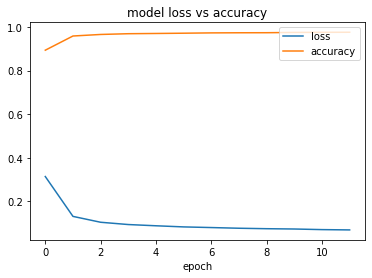

In [417]:
 from matplotlib import pyplot
 pyplot.plot(history.history['loss'])
 pyplot.plot(history.history['accuracy'])
 pyplot.title('model loss vs accuracy')
 pyplot.xlabel('epoch')
 pyplot.legend(['loss', 'accuracy'], loc='upper right')
 pyplot.show() 

In [418]:
# predicting target attribute on testing dataset
test_results = model.evaluate(x_test, y_test, verbose=1)
print(f'Test results - Loss: {test_results[0]} - Accuracy: {test_results[1]*100}%')

985/985 [==============================] - 16s 17ms/step - loss: 0.0707 - accuracy: 0.9759
Test results - Loss: 0.07068526744842529 - Accuracy: 97.59319424629211%


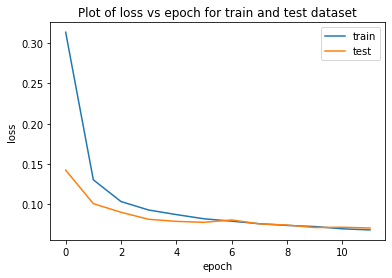

In [419]:
# Plot of loss vs epoch of train and test dataset
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title("Plot of loss vs epoch for train and test dataset")
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='best')
plt.savefig('/content/drive/MyDrive/Assignment3_ai/plots/lstm_binary_loss.png')
plt.show()

In [420]:
y_pred = model.predict(x_test)

In [421]:
n_classes = len(le2.classes_)
n_classes

5

In [422]:
fpr_ae = dict()
tpr_ae = dict()
roc_auc_ae = dict()
for i in range(n_classes):
    fpr_ae[i], tpr_ae[i], _ = roc_curve(y_test[:, i], y_pred[:, i])
    roc_auc_ae[i] = metrics.auc(fpr_ae[i], tpr_ae[i])

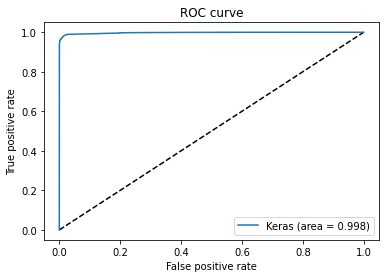

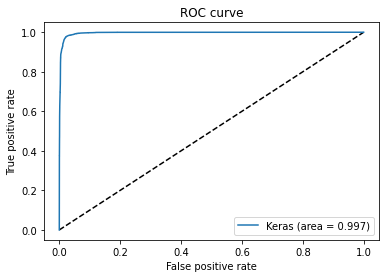

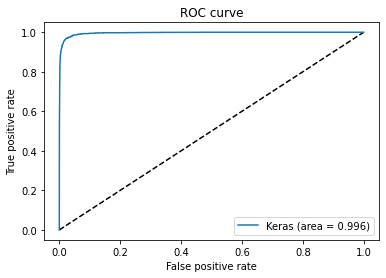

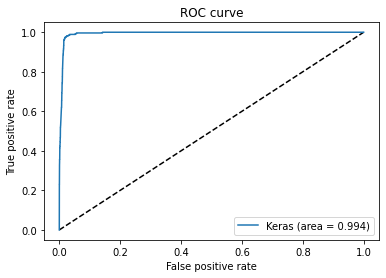

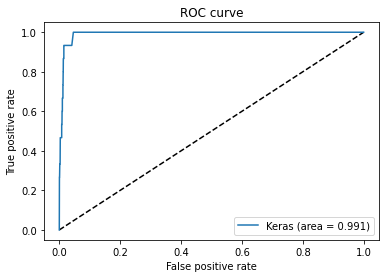

In [423]:
for i in range(n_classes):
  plt.plot([0, 1], [0, 1], 'k--')
  plt.plot(fpr_ae[i], tpr_ae[i], label='Keras (area = {:.3f})'.format(roc_auc_ae[i]))
  plt.xlabel('False positive rate')
  plt.ylabel('True positive rate')
  plt.title('ROC curve')
  plt.legend(loc='best')
  plt.savefig('ae_classifier_multi_roc'+str(i)+'.png')
  plt.show()

In [424]:
for j in range(0,y_pred.shape[1]):
  for i in range(0,y_pred.shape[0]):
    y_pred[i][j] = int(round(y_pred[i][j]))

In [425]:
print("Recall Score - ",recall_score(y_test,y_pred.astype('uint8'),average='micro'))
print("F1 Score - ",f1_score(y_test,y_pred.astype('uint8'),average='micro'))
print("Precision Score - ",precision_score(y_test,y_pred.astype('uint8'),average='micro'))

Recall Score -  0.9988251730488347
F1 Score -  0.7984820793989238
Precision Score -  0.665080975939786


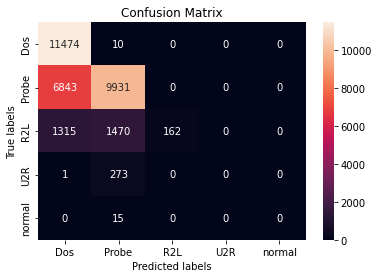

In [426]:
import seaborn as sns
T5_lables =le2.classes_
ax= plt.subplot()
cm = confusion_matrix(np.asarray(y_test).argmax(axis=1), np.asarray(y_pred).argmax(axis=1))
sns.heatmap(cm, annot=True, fmt='g', ax=ax); 
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(T5_lables); ax.yaxis.set_ticklabels(T5_lables);